In [1]:
# This line is needed at the top of the execution so 
# LivePlot can work as expected

%matplotlib notebook

In [2]:
# Some necessary imports

# 'scan' plan, which moves one or more motors in 
# lockstep between starting and ending positions
# and reads one or more detectors at each step
# See: 
# https://nsls-ii.github.io/bluesky/generated/bluesky.plans.scan.html

from bluesky.plans import scan

# Simulated motor and detector, good for testing
# and experimentation

from ophyd.sim import motor, det

# Some callbacks so the produced data is displayed
# as it is taken. These are not strictly necessary
# if the Best Effort Callback (BEC) is enabled (which it
# is by default). BEC can be disabled by passing
# bec=False to nslsii.configure_base in the startup script
# Currently:
# https://github.com/NSLS-II-NYX/profile_collection/blob/main/startup/00-base.py#L10

from bluesky.callbacks.mpl_plotting import LivePlot
from bluesky.callbacks import LiveTable

In [ ]:
# A scan by itself doesn't do anything. It is a 'plan'
# of execution. In this case, a plan to run the motor
# 'motor' between positions -5 and 5 in 30 steps, and
# to read the detector named 'det' at each step

scan([det], motor, -5, 5, 30)

In [8]:
# In order to *actually* run the 'plan', it must be
# given to bluesky's Run Engine (RE)
# Note that the output is a tuple of identifiers (with
# just one element in this case)
# In this cell, the scan ran but didn't produce any output
# because I had BEC disabled

RE(scan([det], motor, -5, 5, 30))

('caf7a807-4745-4a0e-90f4-13d115416b0e',)

In [11]:
# The identifier returned above can be used to query
# the DataBroker, db, and retrieve the data collected
# by the scan.

data = db['caf7a807-4745-4a0e-90f4-13d115416b0e']
data.table()

,time,motor,motor_setpoint,det
seq_num,,,,
1,2020-12-11 22:10:33.137307882,-5.000000,-5.000000,0.000004
2,2020-12-11 22:10:33.141978025,-4.655172,-4.655172,0.000020
3,2020-12-11 22:10:33.147387028,-4.310345,-4.310345,0.000092
4,2020-12-11 22:10:33.151826859,-3.965517,-3.965517,0.000385
5,2020-12-11 22:10:33.157035351,-3.620690,-3.620690,0.001423
6,2020-12-11 22:10:33.162277222,-3.275862,-3.275862,0.004674
7,2020-12-11 22:10:33.167059183,-2.931034,-2.931034,0.013630
8,2020-12-11 22:10:33.174895763,-2.586207,-2.586207,0.035287
9,2020-12-11 22:10:33.180191994,-2.241379,-2.241379,0.081115


<IPython.core.display.Javascript object>


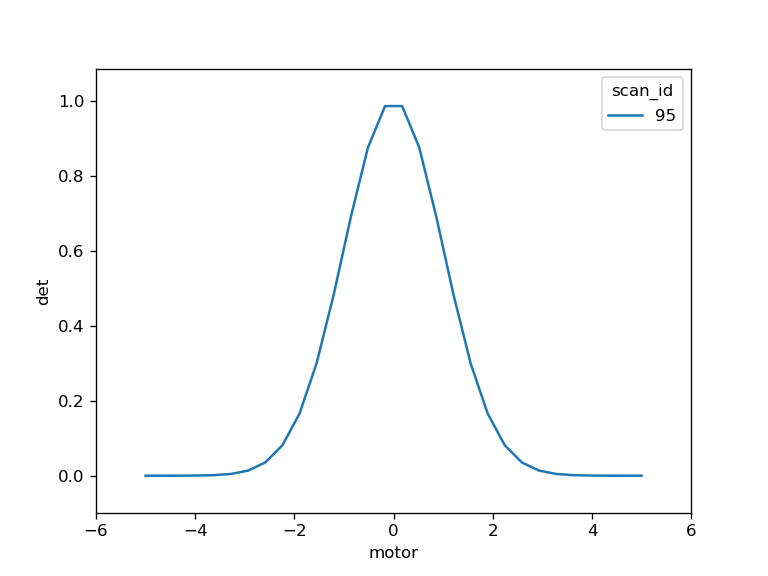



+-----------+------------+------------+----------------+------------+
|   seq_num |       time |      motor | motor_setpoint |        det |
+-----------+------------+------------+----------------+------------+
|         1 | 17:17:04.8 |     -5.000 |         -5.000 |      0.000 |
|         2 | 17:17:04.9 |     -4.655 |         -4.655 |      0.000 |
|         3 | 17:17:05.0 |     -4.310 |         -4.310 |      0.000 |
|         4 | 17:17:05.1 |     -3.966 |         -3.966 |      0.000 |
|         5 | 17:17:05.3 |     -3.621 |         -3.621 |      0.001 |
|         6 | 17:17:05.4 |     -3.276 |         -3.276 |      0.005 |
|         7 | 17:17:05.5 |     -2.931 |         -2.931 |      0.014 |
|         8 | 17:17:05.6 |     -2.586 |         -2.586 |      0.035 |
|         9 | 17:17:05.7 |     -2.241 |         -2.241 |      0.081 |
|        10 | 17:17:05.8 |     -1.897 |         -1.897 |      0.166 |
|        11 | 17:17:05.9 |     -1.552 |         -1.552 |      0.300 |
|        12 | 17:1

In [14]:
# In this example, we're running a *simulated* motor and
# explicitly setting the callback we desire (LivePlot)

motor.delay = .1 # Make the motor go slower for better visualization
run_ids = RE(scan([det], motor, -5, 5, 30), [LivePlot('det', 'motor'), LiveTable([motor, det])])

In [19]:
# We can retrieve the *last* scan data (the one we just ran above) 
# by passing -1 to the databroker.
db[-1]

<IPython.core.display.Javascript object>


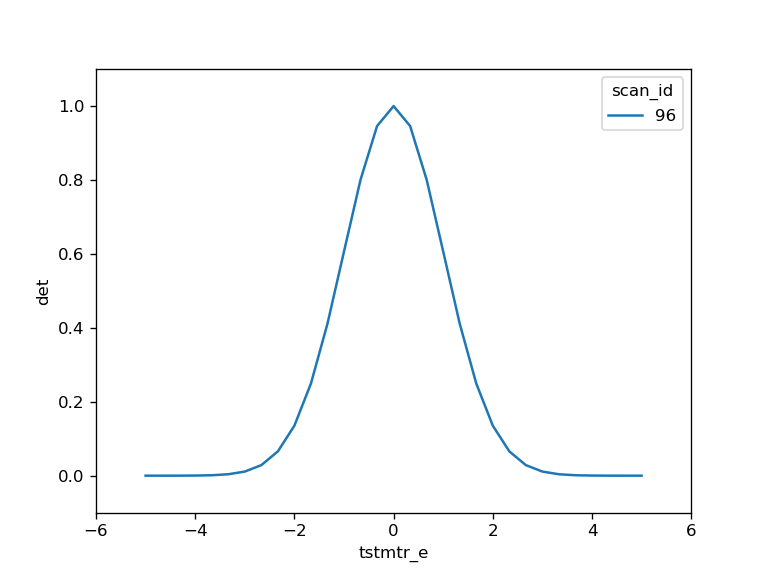



+-----------+------------+------------+------------------------+------------+
|   seq_num |       time |   tstmtr_e | tstmtr_e_user_setpoint |        det |
+-----------+------------+------------+------------------------+------------+
|         1 | 17:21:40.6 |     -5.000 |                 -5.000 |      0.000 |
|         2 | 17:21:41.8 |     -4.667 |                 -4.667 |      0.000 |
|         3 | 17:21:42.6 |     -4.333 |                 -4.333 |      0.000 |
|         4 | 17:21:43.4 |     -4.000 |                 -4.000 |      0.000 |
|         5 | 17:21:44.2 |     -3.667 |                 -3.667 |      0.001 |
|         6 | 17:21:45.0 |     -3.333 |                 -3.333 |      0.004 |
|         7 | 17:21:45.8 |     -3.000 |                 -3.000 |      0.011 |
|         8 | 17:21:46.6 |     -2.667 |                 -2.667 |      0.029 |
|         9 | 17:21:47.4 |     -2.333 |                 -2.333 |      0.066 |
|        10 | 17:21:48.2 |     -2.000 |                 -2.000

In [21]:
# This is a slightly more complicated scan, with two motors
# and two callbacks. Again, this example was ran without
# Best Effort Callbacks, so the callbacks had to be manually
# specified here

run_ids = RE(scan([det], tstmtr.e, -5, 5, motor, -5, 5, 31), [LivePlot('det', 'tstmtr_e'), LiveTable([tstmtr.e, det])])

<IPython.core.display.Javascript object>


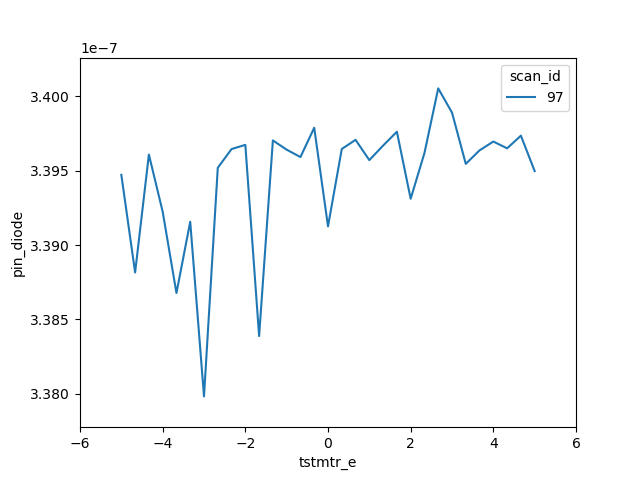



+-----------+------------+------------+------------------------+------------+
|   seq_num |       time |   tstmtr_e | tstmtr_e_user_setpoint |  pin_diode |
+-----------+------------+------------+------------------------+------------+
|         1 | 17:23:26.9 |     -5.000 |                 -5.000 |   0.000000 |
|         2 | 17:23:27.6 |     -4.667 |                 -4.667 |   0.000000 |
|         3 | 17:23:28.4 |     -4.333 |                 -4.333 |   0.000000 |
|         4 | 17:23:29.2 |     -4.000 |                 -4.000 |   0.000000 |
|         5 | 17:23:30.0 |     -3.667 |                 -3.667 |   0.000000 |
|         6 | 17:23:30.8 |     -3.333 |                 -3.333 |   0.000000 |
|         7 | 17:23:31.6 |     -3.000 |                 -3.000 |   0.000000 |
|         8 | 17:23:32.4 |     -2.667 |                 -2.667 |   0.000000 |
|         9 | 17:23:33.2 |     -2.333 |                 -2.333 |   0.000000 |
|        10 | 17:23:34.0 |     -2.000 |                 -2.000

In [22]:
# A scan with a real motor (test motor) and a real
# detector (pin diode). No correlation was expected.

run_ids = RE(scan([pin_diode], tstmtr.e, -5, 5, 31), [LivePlot('pin_diode', 'tstmtr_e'), LiveTable([tstmtr.e, pin_diode])])


<IPython.core.display.Javascript object>


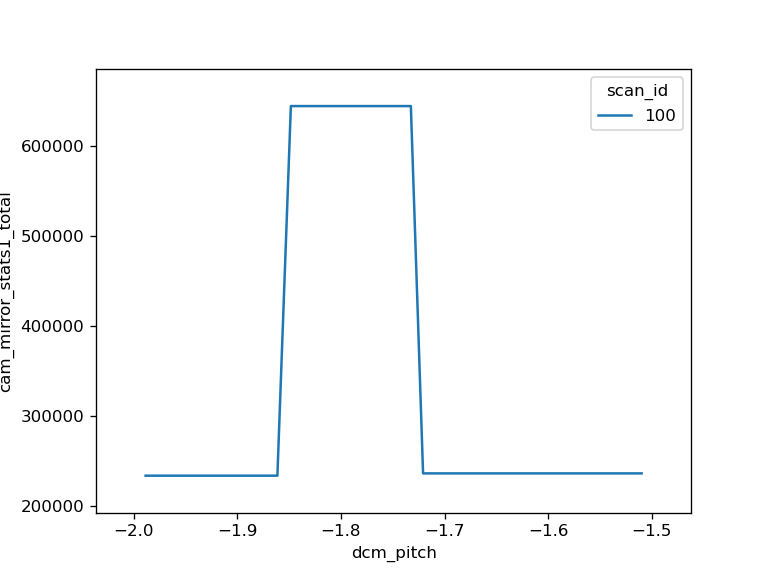



+-----------+------------+------------+-------------------------+-------------------------+
|   seq_num |       time |  dcm_pitch | dcm_pitch_user_setpoint | cam_mirror_stats1_total |
+-----------+------------+------------+-------------------------+-------------------------+
|         1 | 17:41:02.4 |     -1.510 |                  -1.500 |                  236731 |
|         2 | 17:41:02.5 |     -1.510 |                  -1.513 |                  236731 |
|         3 | 17:41:02.6 |     -1.517 |                  -1.526 |                  236731 |
|         4 | 17:41:02.8 |     -1.528 |                  -1.538 |                  236731 |
|         5 | 17:41:03.0 |     -1.541 |                  -1.551 |                  236731 |
|         6 | 17:41:03.2 |     -1.553 |                  -1.564 |                  236731 |
|         7 | 17:41:03.4 |     -1.567 |                  -1.577 |                  236731 |
|         8 | 17:41:03.6 |     -1.578 |                  -1.590 |             

In [7]:
# A real scan, scanning the DCM pitch against the
# camera 'Total' counts statistics
run_ids = RE(scan(
    [cam_mirror.stats1.total], 
    dcm.pitch, -1.5, -2, 40), 
             [LivePlot('cam_mirror_stats1_total', 'dcm_pitch'), 
              LiveTable([dcm.pitch, cam_mirror.stats1.total])])